In [41]:
import plotly.graph_objects as go
import plotly.graph_objects as go
import pandas as pd
import networkx as nx
import random
from networkx.algorithms.community.centrality import girvan_newman
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
import chart_studio.plotly as py
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
from networkx.algorithms import community
import community as community_louvain
import matplotlib.pyplot as plt #For plotting graphs
import igraph as ig
%matplotlib inline
df = pd.read_csv( "/Users/titie/Desktop/Final_Group_project_data_vis/connection_data.csv")
G = nx.from_pandas_edgelist(df, 'source', 'target' ,create_using=nx.Graph())
#G = nx.random_geometric_graph(200, 0.125)
#print(G.nodes)

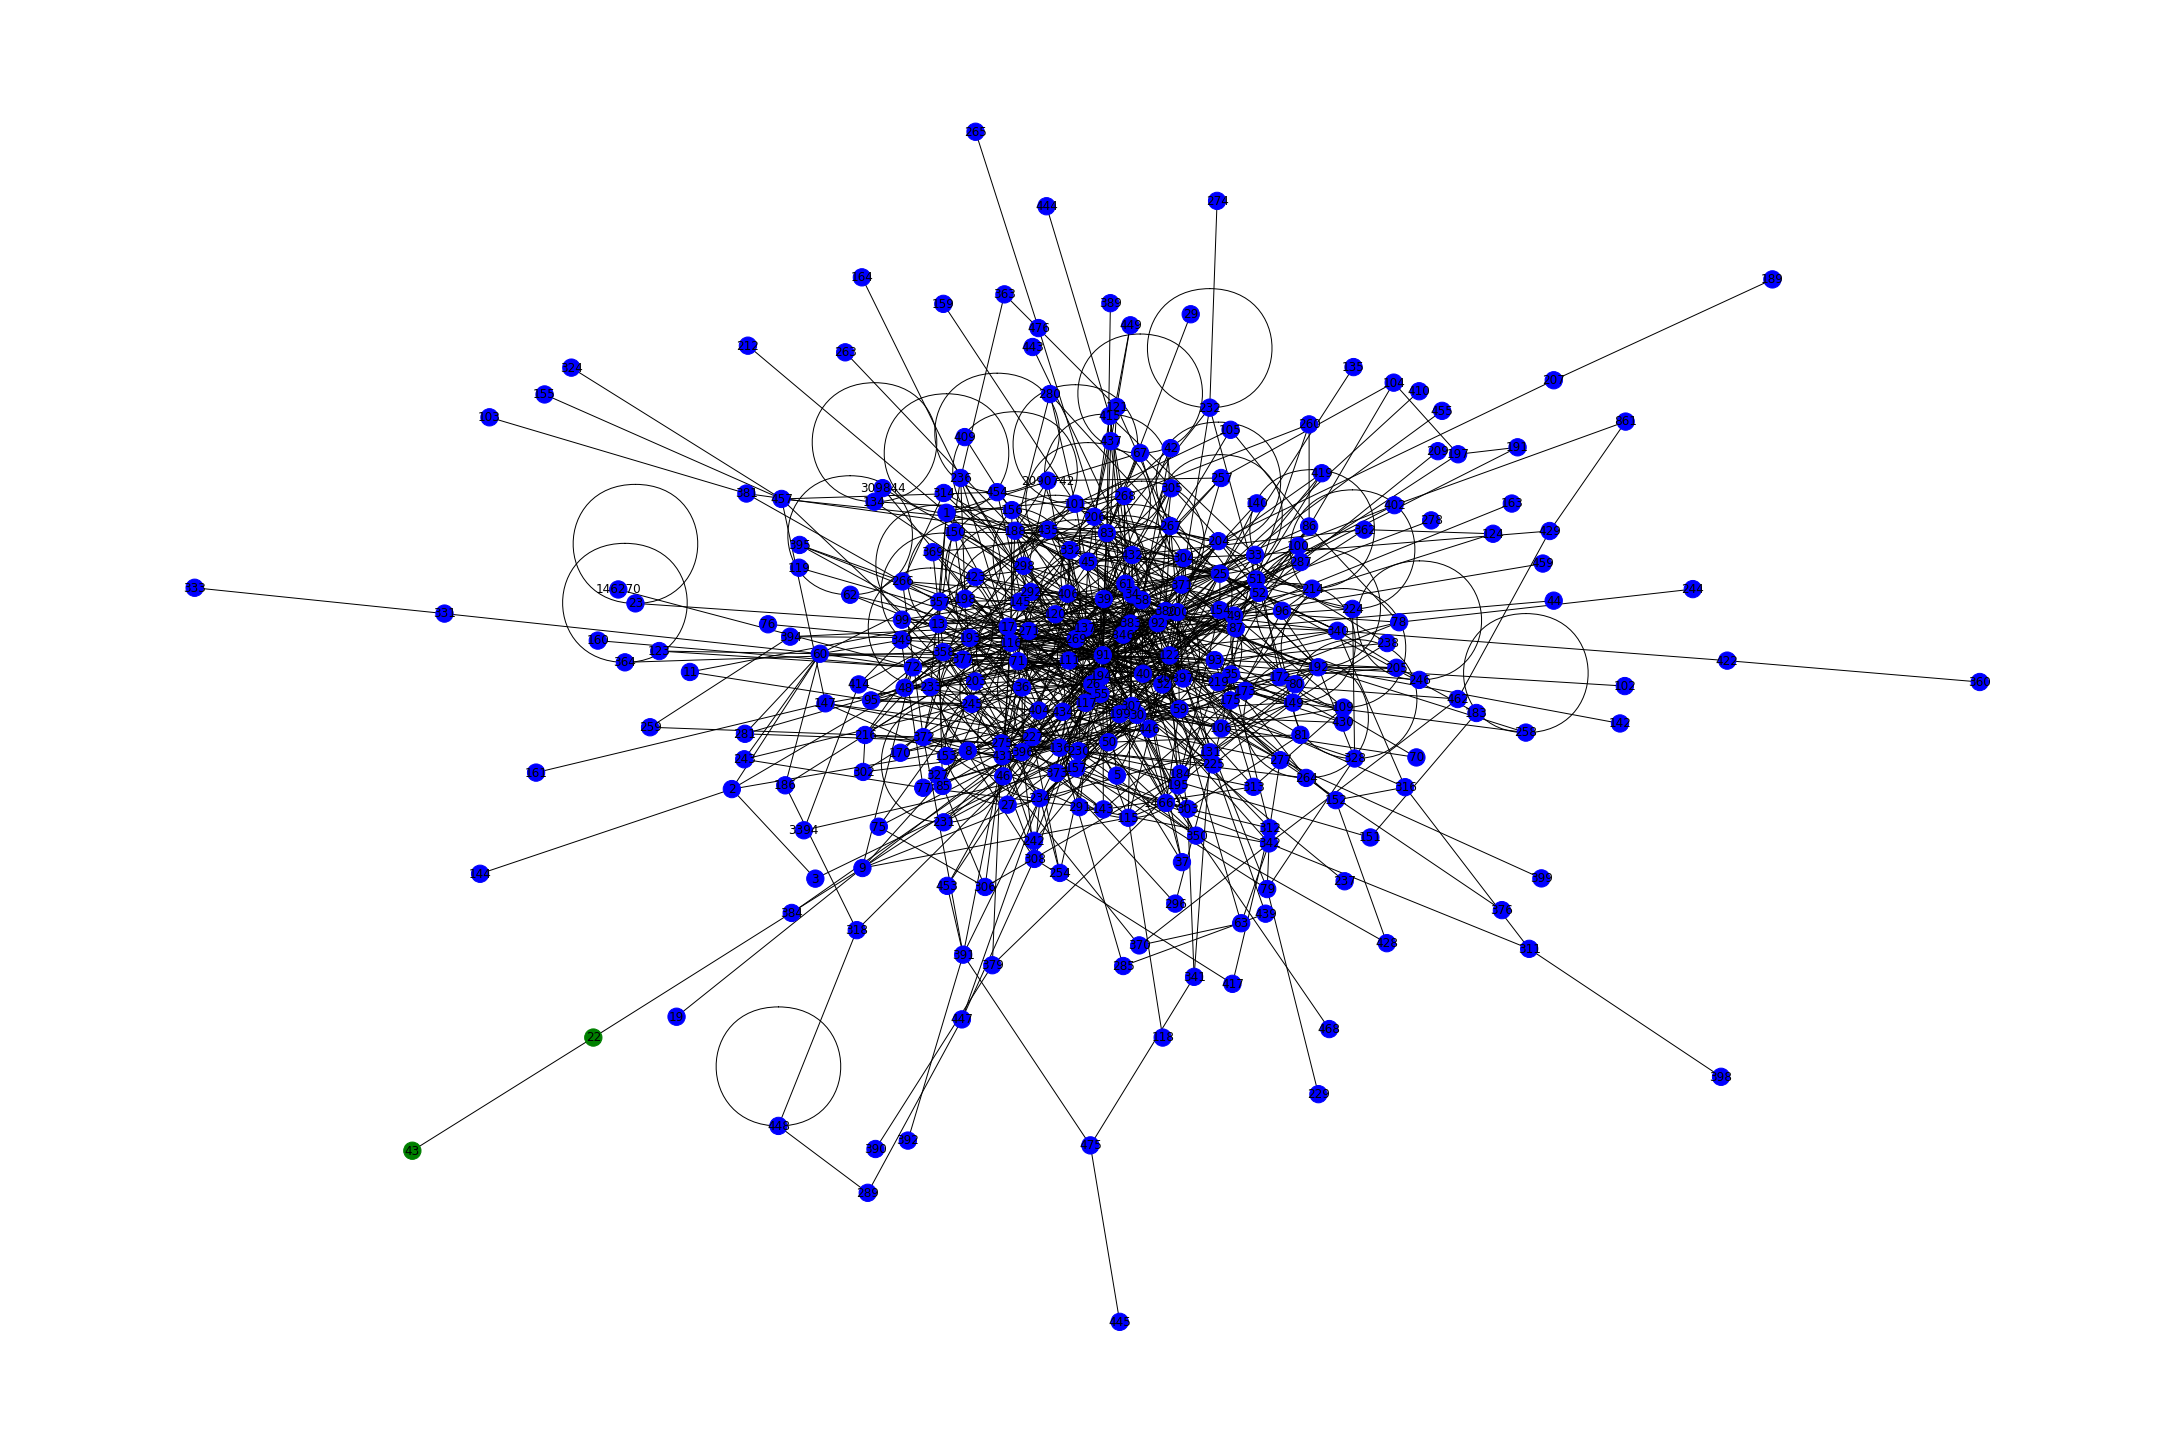

In [44]:
communities = girvan_newman(G)
 
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
 
#print(node_groups)
 
color_map = []
for node in G:
            if node in node_groups[0]:
                color_map.append('blue')
            
            else: 
                
                color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.rcParams.update({'figure.figsize': (30, 20)})
plt.show()

In [45]:
import plotly.graph_objects as go
import plotly.graph_objects as go
import pandas as pd
import networkx as nx
import random
import csv
from matplotlib import pyplot as plt
df = pd.read_csv( "/Users/titie/Desktop/Final_Group_project_data_vis/connection_data.csv")
G = nx.from_pandas_edgelist(df,'source', 'target' , edge_attr=True, create_using=nx.Graph())
#G = nx.from_pandas_edgelist(df, create_using=nx.Graph())
#G = nx.random_geometric_graph(200, 0.125)
print(G)
#print(G.nodes)
#print(G.edges)
#G_directed = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True, create_using=nx.DiGraph())

Graph with 273 nodes and 885 edges


In [46]:


#pos = nx.spiral_layout(G)
#pos = nx.spectral_layout(G)
pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G)
#pos = nx.random_layout(G)
nx.set_node_attributes(G, pos, 'pos')


In [47]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale= 'magma',
        #'viridis',
       
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
           # tickvals=[0,1,10],
            #ticks=range(30),
            #shrink=3,
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right',
           
        ),
        line=dict(width=2)))

In [48]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [49]:
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

The degree centrality of a node is simply its degree—the number of edges it has.
The higher the degree, the more central the node is.
This can be an effective measure, since many nodes with high degrees also have high centrality by other measures.

degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

In [50]:
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = '# of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])
    

In [51]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

#py.iplot(fig, filename='networkx')
fig.show()

In [52]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
import chart_studio.plotly as py
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
from networkx.algorithms import community
import community as community_louvain
import matplotlib.pyplot as plt #For plotting graphs
import igraph as ig
%matplotlib inline
df = pd.read_csv( "/Users/titie/Desktop/Final_Group_project_data_vis/connection_data.csv")
#G = nx.from_pandas_edgelist(df,'source', 'target' , create_using=nx.Graph())
G = nx.from_pandas_edgelist(df, 'source', 'target',edge_attr=True, create_using=nx.DiGraph())


In [53]:
lst_b = nx.algorithms.community.girvan_newman(G)
type(lst_b)


generator

In [54]:
#for x in lst_b:
  #print(x)

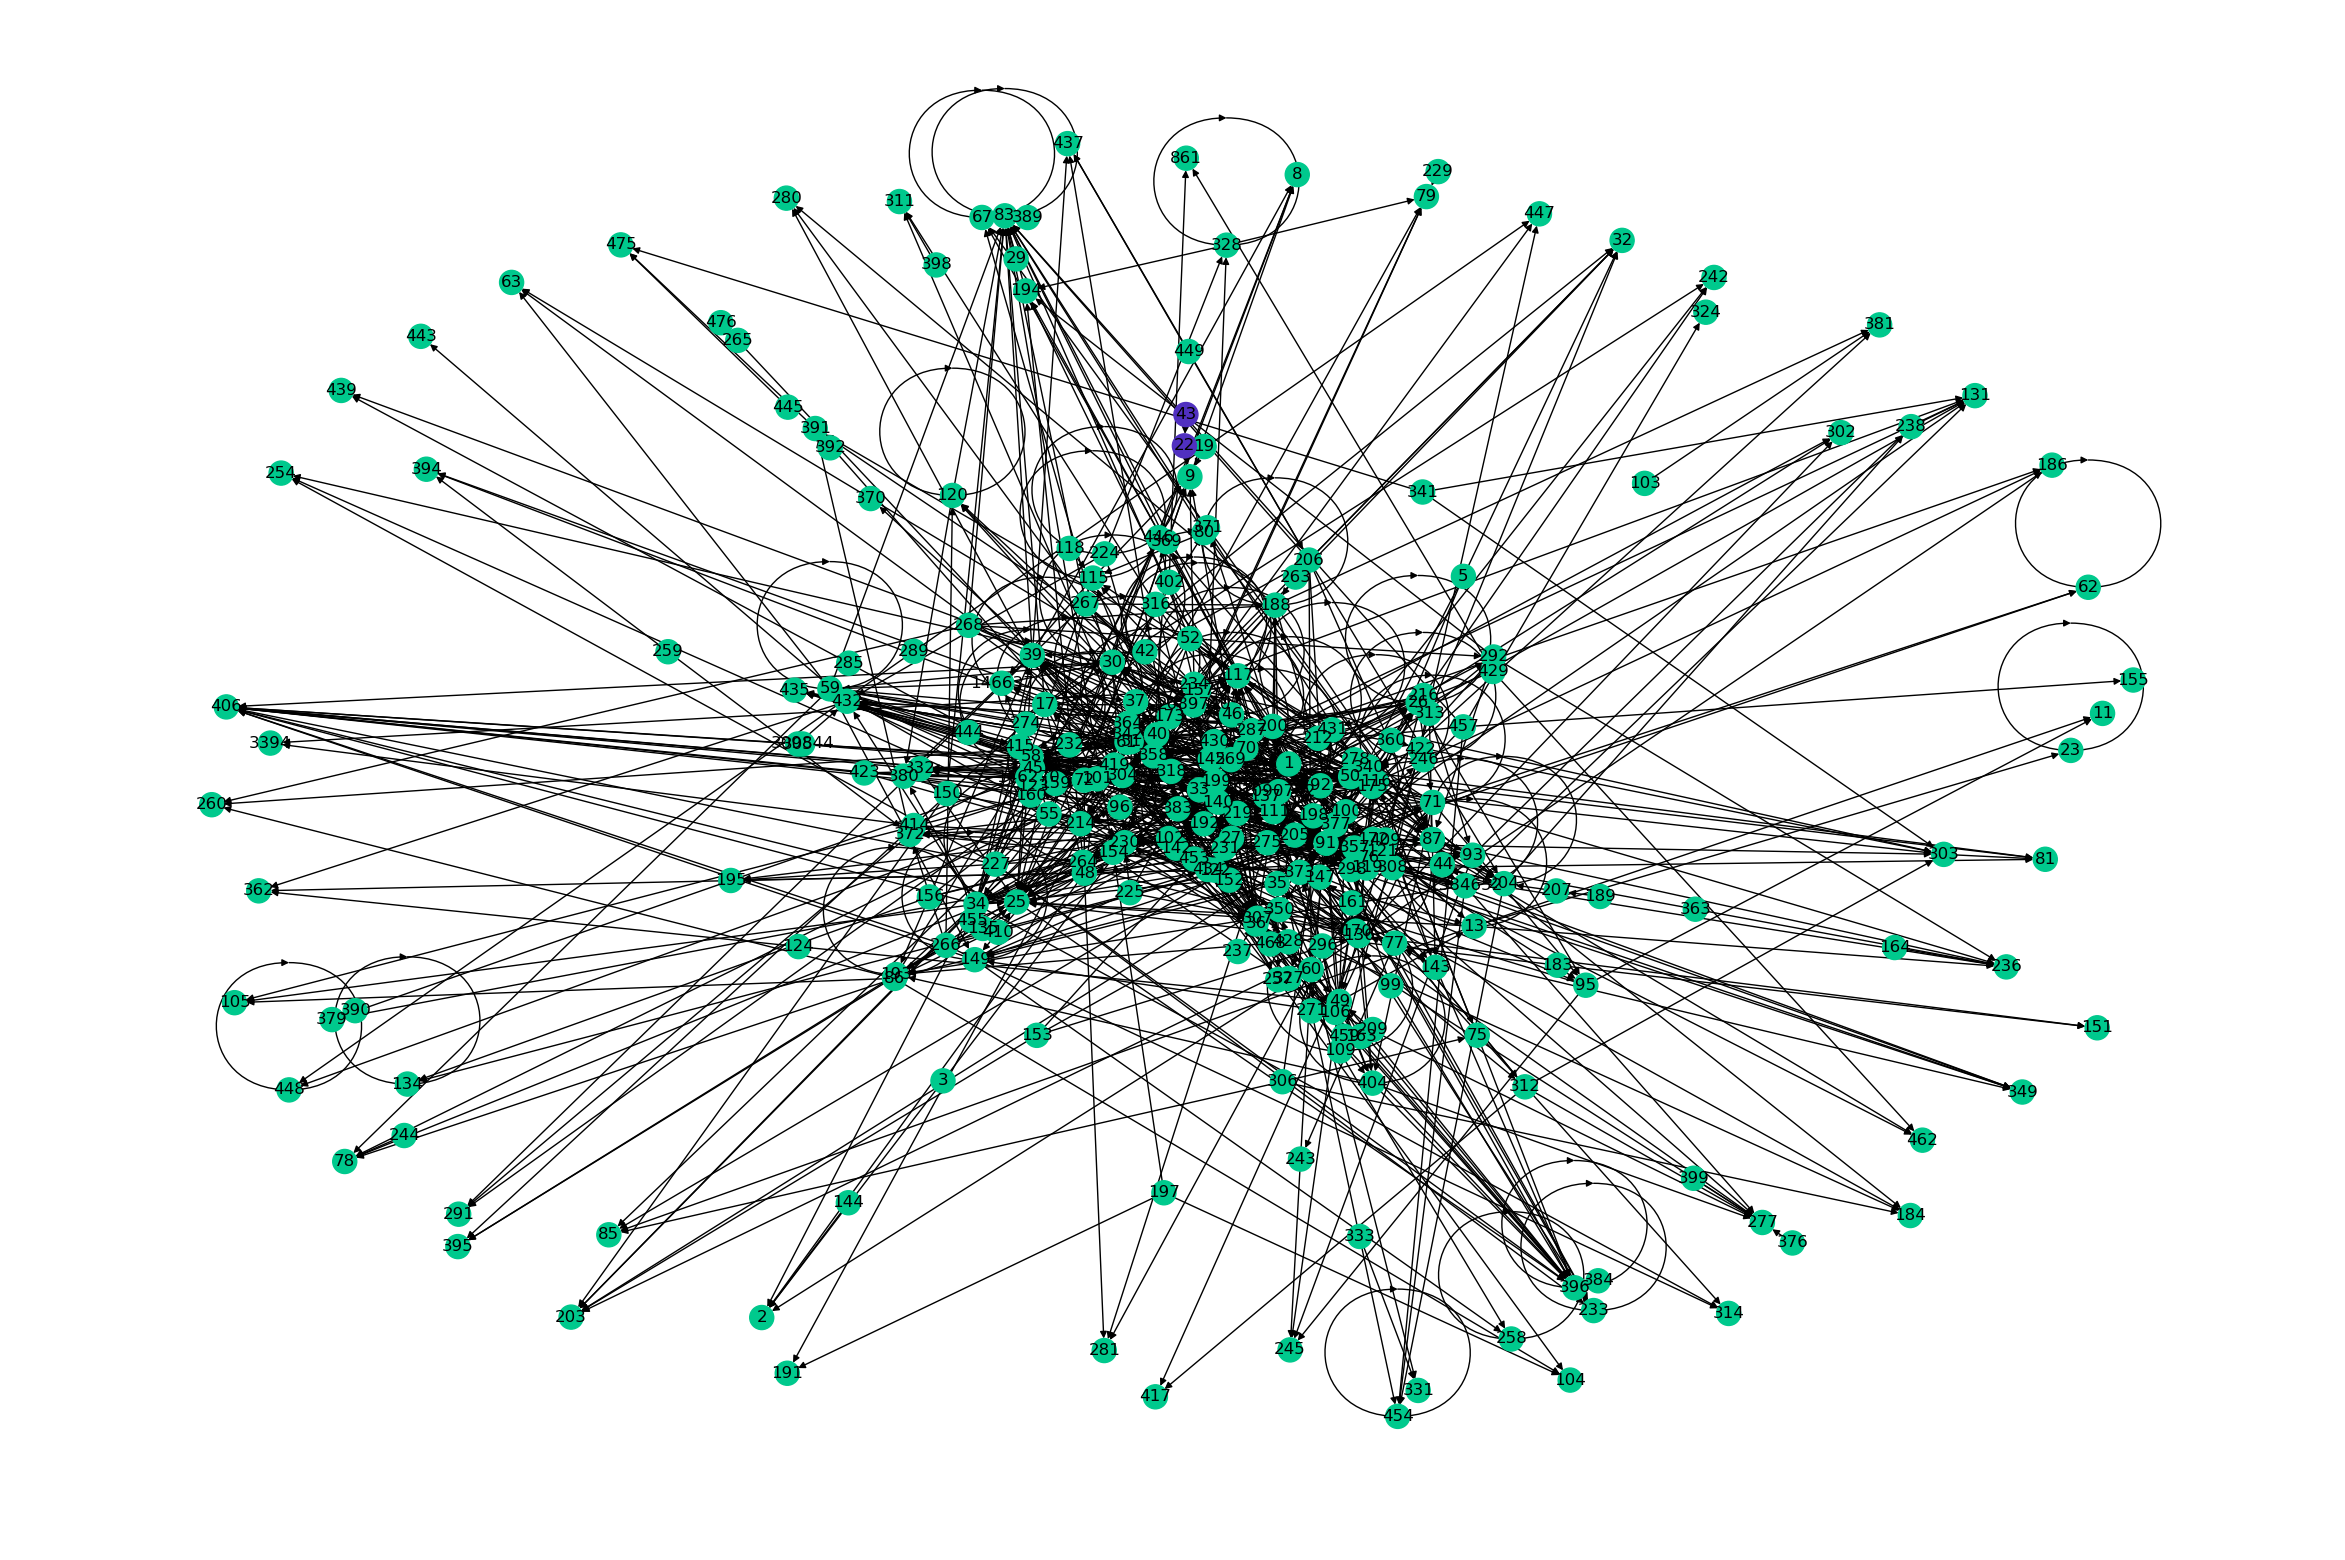

In [58]:
#Community visualization
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_b = community.girvan_newman(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in lst_b:

  for c in x:
    for n in c:
      #print(n,counter)
      color_map_b[n] = colors[counter]
    counter = counter + 1
  break
nx.draw_networkx_edges(G, pos)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.rcParams.update({'figure.figsize': (30, 20)})
plt.axis("off")
plt.show()

In [59]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

In [60]:
df = pd.read_csv( "/Users/titie/Desktop/Final_Group_project_data_vis/connection_data.csv")
G = nx.from_pandas_edgelist(df, 'source', 'target',edge_attr=True, create_using=nx.DiGraph())
    # Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
    # Count the communities



In [61]:
 def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1
def set_edge_community(G):
        '''Find internal edges and add their community to their attributes'''
        for v, w, in G.edges:
            if G.nodes[v]['community'] == G.nodes[w]['community']:
                # Internal edge, mark with community
                G.edges[v, w]['community'] = G.nodes[v]['community']
            else:
                # External edge, mark as 0
                G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
        '''Assign a color to a vertex.'''
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)
        return (r, g, b)

In [62]:
 # Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
    # Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

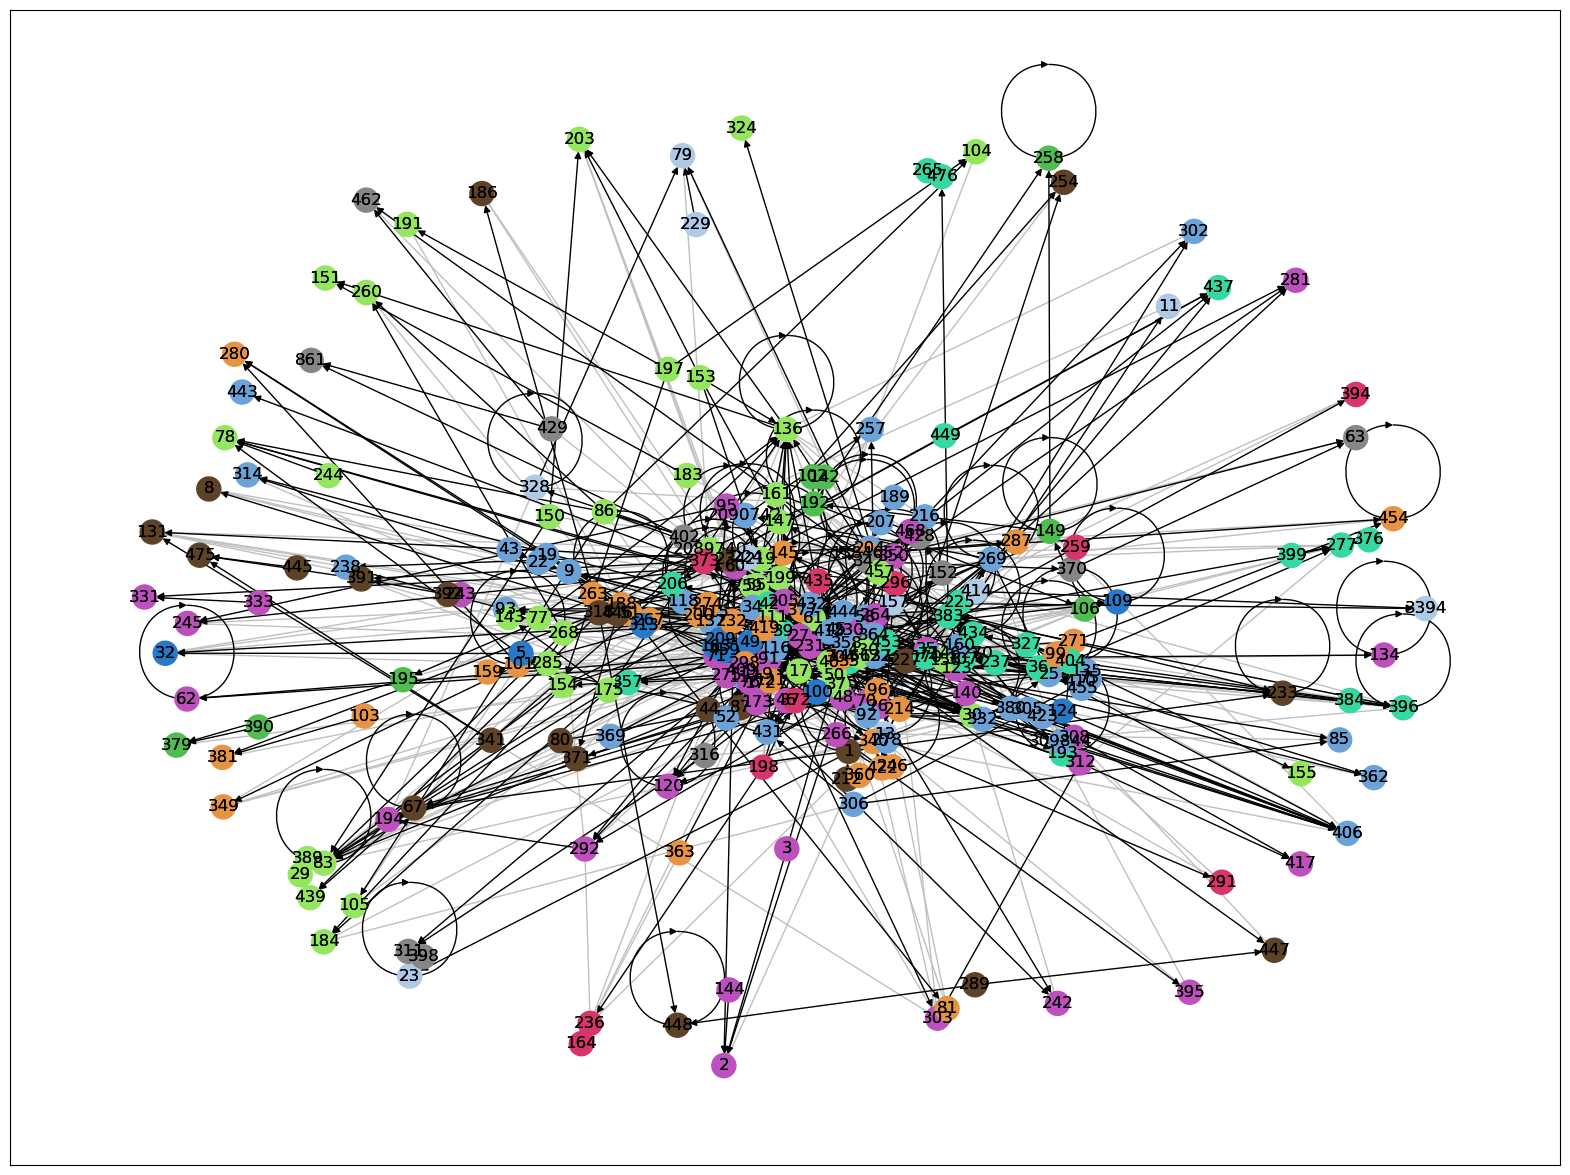

In [63]:
karate_pos = nx.spring_layout(G)
plt.rcParams.update({'figure.figsize': (20, 15)})
    # Draw external edges
nx.draw_networkx(
        G,
        pos=karate_pos,
        node_size=0,
        edgelist=external,
        edge_color="silver")
    # Draw nodes and internal edges
nx.draw_networkx(
        G,
        pos=karate_pos,
        node_color=node_color,
        edgelist=internal,
        edge_color=internal_color)

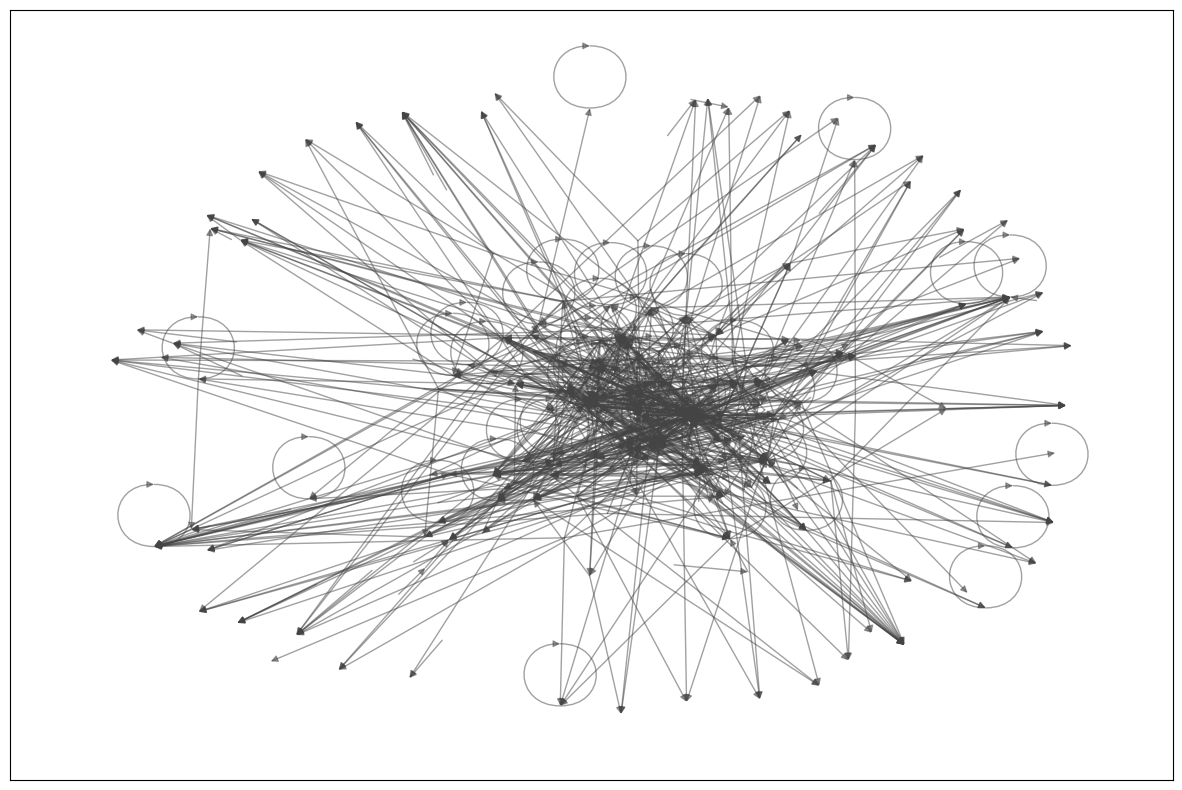

In [65]:
pos = nx.spring_layout(G, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
        G,
        pos=pos,
        node_size=0,
        edge_color="#444444",
        alpha=0.5,
        with_labels=False)


In [28]:
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
len(communities)

11

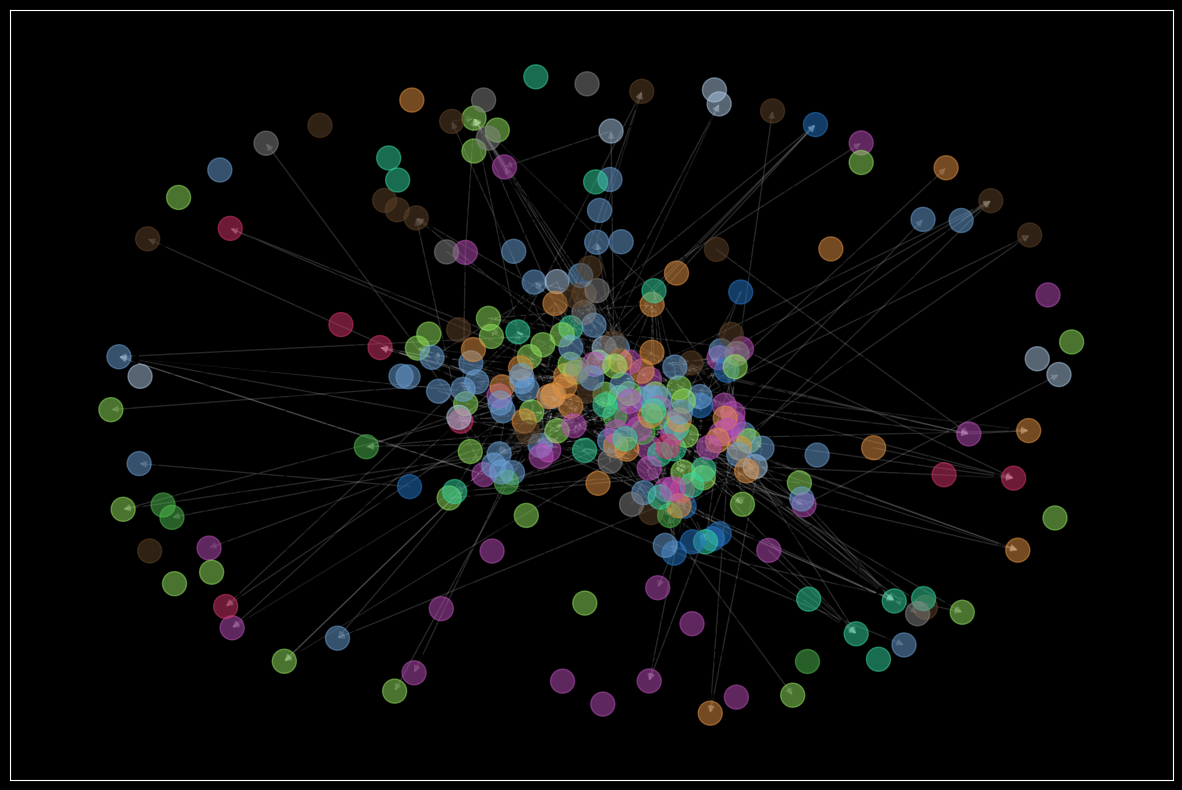

In [33]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# external edges
nx.draw_networkx(
        G,
        pos=pos,
        node_size=0,
        edgelist=external,
        edge_color="silver",
        node_color=node_color,
        alpha=0.2,
        with_labels=False)
# internal edges
nx.draw_networkx(
        G, pos=pos,
        edgelist=internal,
        edge_color=internal_color,
        node_color=node_color,
        alpha=0.5,
        with_labels=False)